In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt


In [4]:
train = datasets.FashionMNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.FashionMNIST("", train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

In [5]:
train_set = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
test_set = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [21]:
train_set

In [7]:
for data in train_set:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [18]:
x = data[0][0]
y = data[1][8]

print(y)

tensor(9)


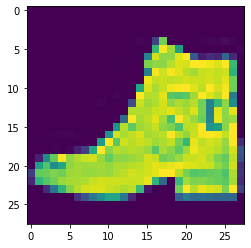

In [19]:
plt.imshow(data[0][8].view(28,28))

In [23]:
class Model(nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim = 1)

model = Model()
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [24]:
x_input = torch.rand(28,28)

In [25]:
x_input = x_input.view(-1, 28*28)

In [26]:
output = model(x_input)

In [27]:
output

tensor([[-2.2456, -2.4085, -2.2528, -2.3591, -2.3274, -2.1793, -2.3031, -2.3851,
         -2.2537, -2.3344]], grad_fn=<LogSoftmaxBackward>)

In [30]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in train_set:

    x_input, y = data
    model.zero_grad()
    output = model(x_input.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()

  print(loss)

tensor(0.0452, grad_fn=<NllLossBackward>)
tensor(0.5318, grad_fn=<NllLossBackward>)
tensor(0.0478, grad_fn=<NllLossBackward>)


In [32]:
correct = 0
total = 0

with torch.no_grad():
  for data in train_set:
    x_input, y = data
    output = model(x_input.view(-1,28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:

        correct += 1
      total += 1

print("Accuracy : ", correct/total)

Accuracy :  0.89075


In [33]:
x_input

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0039, 0.7412,  ..., 0.2392, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

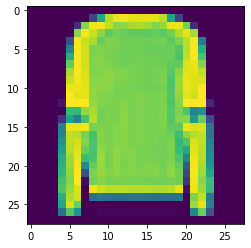

In [34]:
plt.imshow(x_input[8].view(28,28))
plt.show()

In [35]:
print(torch.argmax(model(x_input[8].view(-1, 784))[0]))

tensor(2)


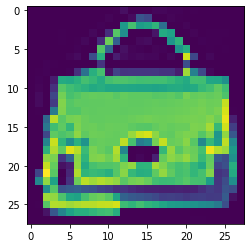

In [37]:
plt.imshow(x_input[1].view(28,28))
plt.show()

In [39]:
torch.argmax(model(x_input[1].view(-1, 784))[0])

tensor(8)